# Predicting vigilance using machine learning
## Random Forest Model 1 CTET
Rosalie Lucas (6540384)

This is the first model on the CTET in my thesis Predicting vigilance using machine learning.
In this model temperature features will be used measured with iButtons.

In [1]:
# Import Libraries needed
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Installed Graphviz using Pip3

In [2]:
data_file_path = '/Users/roos/Data/all_trials_noNaN_CTET2.csv'
data_file = pd.read_csv(data_file_path)
data_ctet = data_file[[ '9A00000045146841', 'F9000000452CCF41', '76000000452C9741', '7200000045201D41',
                        '4B0000004516B141', 'CB000000452D7441', 'DPG_finger-chest',
                        'DPG_nose-forehead', 'DPG_pinna-mastoid', 'results']]

In [3]:
# Splitting the data
X = data_ctet.drop('results', axis=1).values
Y = data_ctet['results'].values
print('X shape: {}'.format(np.shape(X)))
print('Y shape: {}'.format(np.shape(Y)))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

X shape: (4050, 9)
Y shape: (4050,)


In [4]:
dt = DecisionTreeClassifier(max_depth=5, random_state=33)
dt.fit(X_train, Y_train)
print("train", Y_train.sum()/(len(Y_train)))
print("test", Y_test.sum()/len(Y_test))

train 0.5601851851851852
test 0.5370370370370371


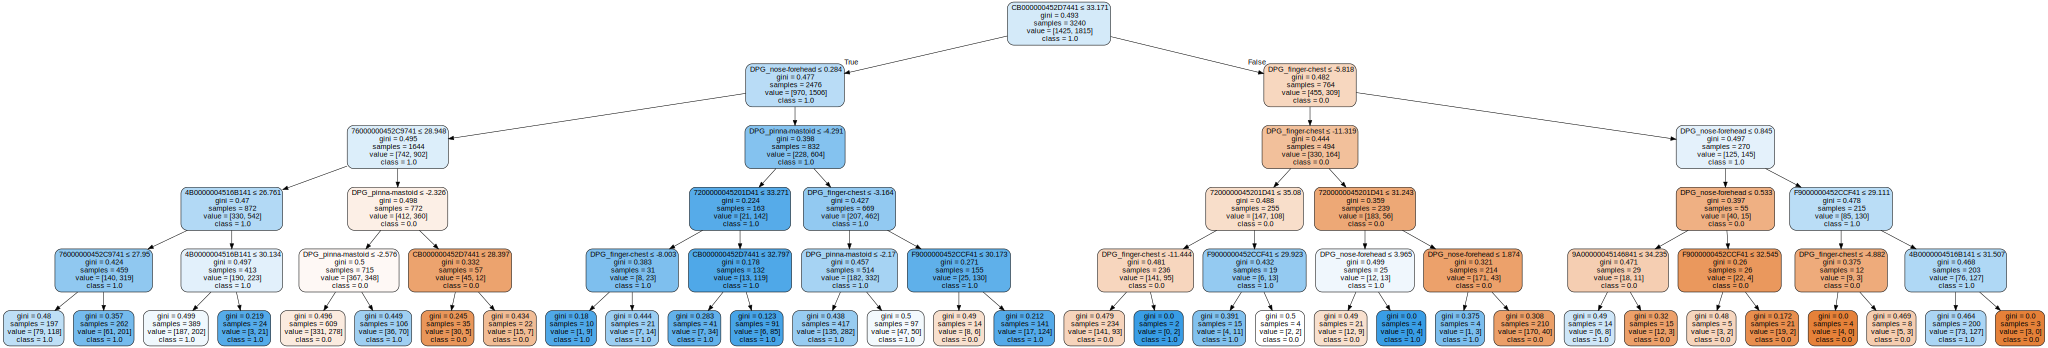

In [5]:
import graphviz

dot_data =  tree.export_graphviz(dt, out_file=None,
                                   feature_names=data_ctet.drop('results', axis=1).columns,
                                   class_names=['0.0', '1.0'],
                                   filled=True, rounded=True,
                                   special_characters=True)
graph = graphviz.Source(dot_data)
#graph.render('model3.gv', view=True)
graph

In [6]:
# Building a forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=0)
random_forest.fit(X_train, Y_train)
# prediction_test = random_forest.predict(X=X_test)

# Accuracy on Test
print("Training Accuracy is: ", random_forest.score(X_train, Y_train))
# Accuracy on Train
print("Testing Accuracy is: ", random_forest.score(X_test, Y_test))

# Building a forest
random_forest2 = RandomForestClassifier(n_estimators=100, random_state=33, max_depth=5)
random_forest2.fit(X_train, Y_train)

# Print hit rate
print("Hit rate train", Y_train.sum()/(len(Y_train)))
print("Hit rate test", Y_test.sum()/len(Y_test))
# Accuracy on Test
print("Optimised Training Accuracy is: ", random_forest2.score(X_train, Y_train))
# Accuracy on Train
print("Optimised Testing Accuracy is: ", random_forest2.score(X_test, Y_test))


Training Accuracy is:  0.8672839506172839
Testing Accuracy is:  0.5839506172839506
Hit rate train 0.5601851851851852
Hit rate test 0.5370370370370371
Optimised Training Accuracy is:  0.6682098765432098
Optimised Testing Accuracy is:  0.6308641975308642


In [7]:
fi2 = ''
final2 = ''
for i, column in enumerate(data_ctet.drop('results', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, random_forest.feature_importances_[i]))
    fi2 = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [random_forest.feature_importances_[i]]})
    try:
        final2 = pd.concat([final2, fi2], ignore_index=True)
    except:
        final2 = fi2

# Ordering the data
final_fi2 = final2.sort_values('Feature Importance Score', ascending=False).reset_index()
final_fi2

Importance of feature 9A00000045146841:, 0.067
Importance of feature F9000000452CCF41:, 0.111
Importance of feature 76000000452C9741:, 0.061
Importance of feature 7200000045201D41:, 0.045
Importance of feature 4B0000004516B141:, 0.163
Importance of feature CB000000452D7441:, 0.121
Importance of feature DPG_finger-chest:, 0.179
Importance of feature DPG_nose-forehead:, 0.168
Importance of feature DPG_pinna-mastoid:, 0.084


,index,Variable,Feature Importance Score
0,6,DPG_finger-chest,0.179093
1,7,DPG_nose-forehead,0.167827
2,4,4B0000004516B141,0.163208
3,5,CB000000452D7441,0.120617
4,1,F9000000452CCF41,0.111252
5,8,DPG_pinna-mastoid,0.084123
6,0,9A00000045146841,0.067352
7,2,76000000452C9741,0.061467
8,3,7200000045201D41,0.045061


In [8]:
fi3 = ''
final3 = ''
for i, column in enumerate(data_ctet.drop('results', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, random_forest2.feature_importances_[i]))
    fi3 = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [random_forest2.feature_importances_[i]]})
    try:
        final3 = pd.concat([final3, fi3], ignore_index=True)
    except:
        final3 = fi3

# Ordering the data
final_fi3 = final3.sort_values('Feature Importance Score', ascending=False).reset_index()
final_fi3


Importance of feature 9A00000045146841:, 0.055
Importance of feature F9000000452CCF41:, 0.098
Importance of feature 76000000452C9741:, 0.121
Importance of feature 7200000045201D41:, 0.055
Importance of feature 4B0000004516B141:, 0.120
Importance of feature CB000000452D7441:, 0.159
Importance of feature DPG_finger-chest:, 0.132
Importance of feature DPG_nose-forehead:, 0.122
Importance of feature DPG_pinna-mastoid:, 0.139


,index,Variable,Feature Importance Score
0,5,CB000000452D7441,0.158940
1,8,DPG_pinna-mastoid,0.138588
2,6,DPG_finger-chest,0.131775
3,7,DPG_nose-forehead,0.121703
4,2,76000000452C9741,0.121259
5,4,4B0000004516B141,0.120116
6,1,F9000000452CCF41,0.098071
7,3,7200000045201D41,0.054978
8,0,9A00000045146841,0.054570
